<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 25px; color: #3498db">1- <u>reduction du nombre de variable de base_edu </u></h1>
    

In [ ]:
!pip install fastparquet
!pip install rpy2
!pip install pandas
!pip install matplotlib

In [3]:
#importation des packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
#chemin de la Base de donn√©es; 
#commentez l'url et vous remplacez par votre chemin sans supprimer!!!!!

url="C:/Users/lisaw/Desktop/ENSAE/2AD/Projet-stat-ap/Donnees/base_Edu.parquet"
base_Edu=pd.read_parquet(url)
base_Edu.head()

unique_learner_id  days_between_signup_and_first_activity  \
0   3838161406066513919                                      41   
1   5829430568065349352                                       0   
2   7677180318050051984                                     787   
3  -5150597998144597550                                     615   
4    969323468959211246                                     169   

   days_between_order_and_first_activity first_theory_activity_date  \
0                                      0 2017-12-17 15:00:23.000000   
1                                      0 2022-07-07 12:02:53.000000   
2                                    788 2022-05-10 01:35:49.000000   
3                                    616 2024-04-18 04:56:03.262330   
4                                    170 2019-03-19 12:32:56.000000   

   days_between_first_and_last_activities  chapter_before_success_count  \
0                                     265                             0   
1                                      27                             0   
2                                     295                             0   
3                                     138                             0   
4                                     554                             0   

   serie_before_success_count  quiz_before_success_count  \
0                           3                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   theory_activities_total  weekly_study_objective  ...  \
0                        3                    <NA>  ...   
1                       11                    <NA>  ...   
2                       73                     240  ...   
3                       75                    <NA>  ...   
4                       41                     120  ...   

   nb_weeks_weekly_study_objective_reached_80pct  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   nb_weeks_weekly_study_objective_reached_75pct  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   nb_weeks_weekly_study_objective_reached_70pct  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   nb_weeks_weekly_study_objective_not_reached  nb_weeks_no_activity  \
0                                            0                     0   
1                                            0                     0   
2                                            1                     0   
3                                            0                     0   
4                                            1                     0   

   nb_weeks_no_weekly_study_objective  pct_study_objective_reached  \
0                                   1                          0.0   
1                                   1                          0.0   
2                                   0                          0.0   
3                                   1                          0.0   
4                                   0                          0.0   

   pct_study_objective_not_reached  pct_study_objective_no_activity  \
0                              0.0                              0.0   
1                              0.0                              0.0   
2  

In [5]:
print(base_Edu.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 477 entries, unique_learner_id to pct_no_objective_weeks
dtypes: Int64(72), boolean(254), datetime64[us](1), float64(150)
memory usage: 450.9 MB
None


La base de donn√©es compte donc 477 variables dont 72 de type Int, 254 de type boolean, 1 de type datetime et 150 de type float soit au total 254 variables qualitatives (**boolean**) et 221 variables quantitatives(**float + int** en excluant les identifiants) sans oublier la variable de type **datetime**.

Nous commencons par √©purer la base donn√©es avant de passer √† la r√©duction de dimension. On s'int√©ressera aux valeurs manquantes. 

In [5]:
missing_value=(base_Edu.isnull().sum()/len(base_Edu))
missing_value[missing_value>0]
missing_value[missing_value>0].describe()

count    404.000000
mean       0.743390
std        0.279055
min        0.047720
25%        0.666710
50%        0.842345
75%        0.918625
max        1.000000
dtype: float64

La base de donn√©es comporte donc 404 variables avec valeurs manquantes sur le total des 476 variables de la base ce qui n'est pas du tout n√©gligeable. Voyons combien de valeurs manquantes at-on par type de variables. 

In [6]:
print(base_Edu.select_dtypes("int").isnull().any().sum()," variables de type int ont des valeurs manquantes")
print(base_Edu.select_dtypes("float").isnull().any().sum()," variables de type float ont des valeurs manquantes")
print(base_Edu.select_dtypes("boolean").isnull().any().sum()," variables de type boolean ont des valeurs manquantes")
print(base_Edu.select_dtypes("datetime").isnull().any().sum()," variables de type datetime ont des valeurs manquantes")

48  variables de type int ont des valeurs manquantes
103  variables de type float ont des valeurs manquantes
253  variables de type boolean ont des valeurs manquantes
0  variables de type datetime ont des valeurs manquantes


La seule variable de type datetime n'a donc pas de valeurs manquantes.  Analysons de plus pr√®s les proportions de valeurs manquantes des autres types

In [7]:
miss_bool=base_Edu.select_dtypes("boolean").isnull().sum()/len(base_Edu)
miss_bool[miss_bool>0].describe()

count    253.000000
mean       0.903116
std        0.072136
min        0.695085
25%        0.837765
50%        0.883305
75%        1.000000
max        1.000000
dtype: float64

Les variables de type boolean comporte pratiquement tous assez de valeurs manquantes avec un minimum de 69% et un maximum de 100% du total des observations

Les valeurs manquantes de la base ne sont pas compl√®tement al√©atoires. Elles ne sont pas pour la plupart le fruit d'une mauvaise collecte de donn√©es. La pr√©sence de valeurs manquantes dans cette base est due √† diverses raisons notamment le fait que plusieurs individus de la base n'ont pas encore pass√© d'examen pour le permis. Plusieurs questions(variables) n'ont de sens que dans le cas o√π le premier examen est pass√©. Il y a donc une part d'information apport√© par ces valeurs manquantes que nous devons inclure dans nos analyses. Pour les variables bool√©enne, nous pouvons r√©gler ce prbl√®me c'est √† dire prendre en compte l'information apport√©e par ces valeurs manquantes en transformant les variables bool√©ennes en variable cat√©gorielles en consid√©rant les valeurs manquantes comme une cat√©gorie(True=1,False=0 et NA=2).

In [8]:
#print(base_Edu.select_dtypes('category'))
def encode_column_with_na(col):
    mapping = {True: 1, False: 0, pd.NA: 2}  # Encoder les valeurs bool√©ennes et <NA>
    return col.map(mapping)
colboo=base_Edu.select_dtypes("boolean").columns
for col in colboo:
    base_Edu[col] = encode_column_with_na(base_Edu[col]).astype("category")
#base_Edu["is_first_exam_success"].cat.categories


Passons maintenant aux variables quantitatives (int+float)

In [9]:
miss_quant=base_Edu.select_dtypes(include=["int","float"]).isnull().sum()/len(base_Edu)
miss_quant[miss_quant>0].describe()

count    151.000000
mean       0.475770
std        0.292138
min        0.047720
25%        0.184915
50%        0.483995
75%        0.736010
max        0.941710
dtype: float64

Pour les variables quantitatives, la distribution des valeurs manquantes est plus √©tendue. On enregistre 151 variables quantitatives avec valeurs manquantes. On a un minimum de 4% et un maximum de 94% de valeurs manquantes par rapport au total d'observation(nous rappelons 200000 obervations). La nature des variables et la distribution des valeurs manquantes dans ce cas ne facilite pas la capture de l'information apport√©e par la pr√©sence de ces valeurs manquantes. On pourrait opter pour une imputation par KNN ou par imputation it√©rative (MICE) mais cela risque de modifier et significativement les corr√©lations existant d√©j√† entre les variables introduisant ainsi un important biais et au vue de la taille de l'echantillon, cela demanderait un temps d'excution √©norme. On choisit ici donc de proc√©der √† une imputation par la m√©diane apr√®s suppression des variables avant un taux √©lev√© de valeurs manquantes pour minimiser le biais. Cela permettra de ne pas trop distordre les distributions existentes.

In [10]:
miss_quant[miss_quant<=0.20].describe()

count    118.000000
mean       0.054362
std        0.074368
min        0.000000
25%        0.000000
50%        0.000000
75%        0.106310
max        0.194530
dtype: float64

Nous choisissons le seuil de 20% de valeurs manquantes. Ce seuil nous parait raisonnable puisqu'il est relativement faible et n'entraine pas la suppression d'un grand nombre de variables quantitatives (118 sont conserv√©es sur un total de 151)

In [11]:
#suppression des variables avec plus de 20% de valeurs manquantes
base_Edu=base_Edu.drop(columns=miss_quant[miss_quant>0.20].index)
#Imputation par la m√©diane
col=base_Edu.select_dtypes(exclude='category').columns
base_Edu[col] = base_Edu[col].fillna(base_Edu[col].median())

In [13]:
base_Edu.isnull().any().sum()

0

In [12]:
df1 = base_Edu.select_dtypes(exclude=['datetime64'])  # Colonnes non datetime64
df2 = base_Edu.select_dtypes(include=['datetime64']) #colonnes datetime
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 372 entries, unique_learner_id to pct_no_objective_weeks
dtypes: Int64(47), category(254), float64(71)
memory usage: 237.5 MB


In [13]:
#sauvegarde des donn√©es sans var date
df1.to_parquet('data_Edu.parquet', index=False)

Plus aucune valeur manquante. La base de donn√©es enfin pr√™te, on peut passer aux op√©rations de r√©duction de dimension

<br/>
<p style="font-family: 'Georgia', serif; text-align: center;color:rgb(47, 99, 220);font-size: 30px">
<u>
R√©duction de dimension</u>
</p>
<br/>

Etant donn√©e la dimension de la base de donn√©es( beaucoup de variables), ce sera tr√®s complexe voir impossible de faire des analyses ou entrainer un mod√®le directement sur cette base. Il est donc important voir optimale de faire au pr√©alable une r√©duction de dimension. Pour ce faire, nous allons utiliser diff√©rentes approches de r√©duction de dimension, faire des comparaisons puis retenir la meilleure approche dans ce cas. Il s'agira principalement de faire une **analyse enn composante principale (ACP)** , une **FAMD** et utiliser **un autoencodeur**.

<br/>
<p style="font-family: 'Georgia', serif; text-align: center;font-size: 25px">
<u>
1- Analyse en composantes principales (ACP) </u>
</p>
<br/>

Pour effectuer l'ACP il faut restreindre la base aux variables quantitatives.

In [14]:
data=base_Edu.select_dtypes(include=["int","float"])
data=data.drop(["unique_learner_id"], axis=1)

Par la suite, nous allons standardiser les variables afin de faire qu'elles aient toutes la m√™me √©chelle car l'ACP d√©pend fortement de l'√©chelle des variables.

In [15]:
scaler =StandardScaler()
X_scaled =scaler.fit_transform(data)

<br/>
<p style="font-family: 'Georgia', serif; text-align: center;font-size: 23px">
 a)- Choix du nombre de composantes principales
</p>
<br/>

#### **R√®gle du coude**

Il s'agit ici de construire la courbe de d√©croissance des valeurs propres et de d√©tecter des "coudes" (ou "cassures") signalant un changement de structure.

Text(0.5, 0, 'Principal components')

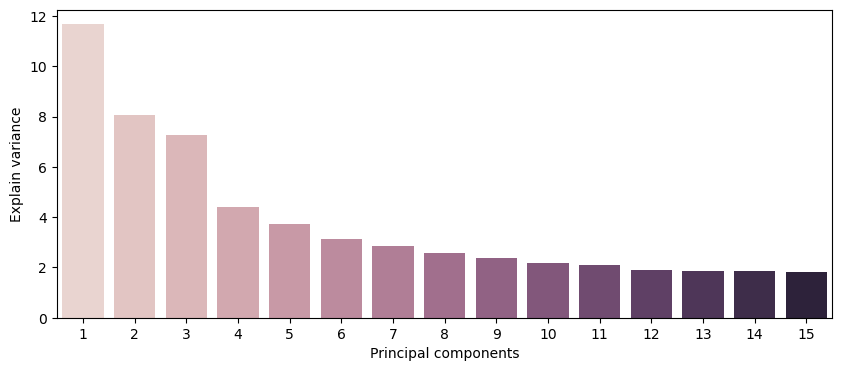

In [25]:
plt.figure(figsize=(10, 4))
pca=PCA(n_components=15)
pca.fit(X_scaled)
sns.barplot(x= np.arange(1,16) , y=pca.explained_variance_ratio_*100, hue=np.arange(1,16), legend=False)
plt.ylabel("Explain variance")
plt.xlabel("Principal components")

On observe de ce graphique qu'il y a deux coudes possibles, l'un √† la deuxi√®me composante et l'autre √† la sixi√®me composante. La premi√®re composante principale explique 11,66% de la variance totale, la deuxi√®me en explique 8,05%, la troisi√®me 7,27%, et √† partir de la sixi√®me composante principale, le pourcentage de variable expliqu√©e devient inf√©rieur √† 3%. Les facteurs restants ont donc un apport d'information n√©gligeable.

A ce graphique, on ajoute le graphique qui d√©crit l'√©volution de la variance expliqu√©e par les axes.

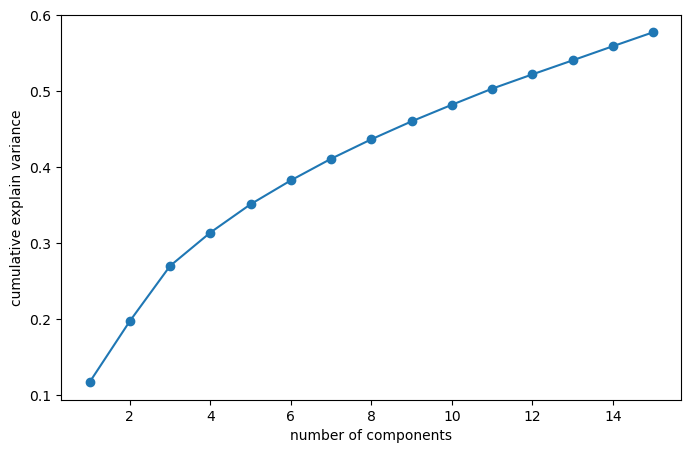

In [26]:
explained_variances=[]
for n in range(1,16):
    pca =PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8,5))
plt.plot(range(1,16), explained_variances, marker='o')
plt.xlabel("number of components")
plt.ylabel("cumulative explain variance")
plt.show()

Ce graphique semble indiquer que le coude se trouve √† la troisi√®me composante principale. Cependant, Considerer trois composantes principales n'est pas une bonne id√©e car on perdrais le gain d'information substanciel qu'apporte les 2 composantes principales suivantes. Les 5 premi√®res composantes principales expliquent environ 35% de l'information. Nous allons poursuivre cette recherche du nombre de composantes optimale en utilisant le test des b√¢tons bris√©s.

#### **Test des ¬´ b√¢tons bris√©s ¬ª**

Ce test est du √† Frontier (1976) et Legendre-Legendre (1983). Il repose sur l‚Äôid√©e que si l‚Äôinertie totale √©tait dispatch√©e al√©atoirement sur les axes, la distribution des valeurs propres suivrait la loi des 
¬´ b√¢tons bris√©s ¬ª (broken-stick). La valeur critique pour le choix des composantes principales s'√©crit comme suit:
$$ b_{k} = \sum_{i=k}^{p} \frac 1 {i}$$

o√π p repr√©sente le nombre de variables.

In [23]:
baton_coef=[]
for i in np.arange(1,16):
    n=0
    for j in range(i,117):
        n=n+(1/j)
    baton_coef.append(n)

In [24]:
data1=pd.DataFrame(data=pca.explained_variance_, columns=["eigen_values"])
data1["b_k"]=baton_coef
data1.index=["PC{}".format(i) for i in np.arange(1,16)]
data1

eigen_values       b_k
PC1      11.433010  5.335110
PC2       7.889850  4.335110
PC3       7.125282  3.835110
PC4       4.303626  3.501777
PC5       3.656622  3.251777
PC6       3.079037  3.051777
PC7       2.792477  2.885110
PC8       2.509312  2.742253
PC9       2.315227  2.617253
PC10      2.138628  2.506142
PC11      2.075094  2.406142
PC12      1.883521  2.315233
PC13      1.836884  2.231899
PC14      1.821218  2.154976
PC15      1.768835  2.083548

Avec ce test on peut retenir 5 composantes principales, car √† la diff√©rence entre la valeur propre de la sixi√®me composante principale et le seuil calcul√© est n√©gligeable. Pour les composantes suivantes, les valeurs propres sont en dessous du seuil.

Nous retiendrons donc 5 composantes principales dans la suite.

<br/>
<p style="font-family: 'Georgia', serif; text-align: center;font-size: 23px">
b)- Entrainement du mod√®le
</p>
<br/>

In [16]:
# training the model with 5 principal components
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
print("Explain variance for each component :",pca.explained_variance_ratio_)
print("cumulated variance :",pca.explained_variance_ratio_.sum())

Explain variance for each component : [0.11666279 0.08050827 0.0727066  0.04391469 0.03731249]
cumulated variance : 0.3511048318033728


In [17]:
# coefficients of the principal components 
print("Composantes principales (coefficients) :")
table_coef=pd.DataFrame(pca.components_, columns=data.select_dtypes(exclude='category').columns)
table_coef.index=["PC{}".format(i+1) for i in np.arange(0,5)]
table_coef

Composantes principales (coefficients) :


days_between_signup_and_first_activity  \
PC1                                0.066023   
PC2                               -0.008063   
PC3                               -0.011089   
PC4                               -0.012169   
PC5                                0.096430   

     days_between_order_and_first_activity  \
PC1                               0.075380   
PC2                              -0.011526   
PC3                              -0.024572   
PC4                              -0.023764   
PC5                               0.049827   

     days_between_first_and_last_activities  chapter_before_success_count  \
PC1                               -0.004304                 -2.710505e-20   
PC2                                0.001866                  0.000000e+00   
PC3                                0.029455                 -1.110223e-16   
PC4                               -0.102450                 -5.551115e-17   
PC5                                0.418300                  0.000000e+00   

     serie_before_success_count  quiz_before_success_count  \
PC1                    0.117614                   0.108084   
PC2                    0.064442                   0.019719   
PC3                   -0.054100                   0.053615   
PC4                   -0.172160                  -0.000519   
PC5                    0.002723                  -0.017382   

     theory_activities_total  percentage_activities_2_3_4h_week  \
PC1                 0.151237                          -0.005015   
PC2                 0.024426                           0.005472   
PC3                -0.048470                           0.009290   
PC4                -0.288067                          -0.011698   
PC5                 0.017505                           0.011653   

     percentage_activities_5_6_7h_week  percentage_activities_23_0_1h_week  \
PC1                           0.010848                            0.006412   
PC2                          -0.002838                            0.010553   
PC3                          -0.005749                            0.014140   
PC4                          -0.003291                           -0.014431   
PC5                           0.012641                            0.005018   

     ...  nb_weeks_weekly_study_objective_reached_80pct  \
PC1  ...                                       0.124556   
PC2  ...                                       0.309994   
PC3  ...                                       0.038576   
PC4  ...                                       0.053974   
PC5  ...                                      -0.000583   

     nb_weeks_weekly_study_objective_reached_75pct  \
PC1                                       0.124960   
PC2                                       0.305893   
PC3                                       0.037714   
PC4                                       0.051357   
PC5                                      -0.000302   

     nb_weeks_weekly_study_objective_reached_70pct  \
PC1                                       0.125143   
PC2                                       0.300151   
PC3                                       0.036979   
PC4                                       0.047793   
PC5                                       0.000038   

     nb_weeks_weekly_study_objective_not_reached  nb_weeks_no_activity  \
PC1                                     0.096558              0.017135   
PC2                                     0.033900              0.009572   
PC3                                     0.021819              0.007797   
PC4                                    -0.081462             -0.001142   
PC5                                     0.023226              0.006160   

     nb_weeks_no_weekly_study_objective  pct_study_objective_reached  \
PC1                           -0.004208                     0.089261   
PC2                            0.012058                     0.210167   
PC3                           -0.092366                     0.025101   

In [18]:
# contributions of the principal components
loadings=pca.components_.T
eigenvalues=pca.explained_variance_
contributions=(loadings**2)*eigenvalues
contrib_percent=contributions/(eigenvalues.sum())*100
contrib_df=pd.DataFrame(contrib_percent, columns=["PC{}".format(i+1) for i in np.arange(0,5)])
contrib_df.index=data.columns
contrib_df.head()

PC1       PC2           PC3  \
days_between_signup_and_first_activity  1.448413e-01  0.001491  2.546388e-03   
days_between_order_and_first_activity   1.888035e-01  0.003046  1.250339e-02   
days_between_first_and_last_activities  6.153829e-04  0.000080  1.796671e-02   
chapter_before_success_count            2.441159e-38  0.000000  2.552451e-31   
serie_before_success_count              4.596384e-01  0.095224  6.060847e-02   

                                                 PC4       PC5  
days_between_signup_and_first_activity  1.852225e-03  0.098820  
days_between_order_and_first_activity   7.063180e-03  0.026384  
days_between_first_and_last_activities  1.312800e-01  1.859487  
chapter_before_success_count            3.854193e-32  0.000000  
serie_before_success_count              3.707144e-01  0.000079

<br/>
<p style="font-family: 'Georgia', serif; text-align: center;font-size: 23px">
c)- Interpr√©taion des axes principaux
</p>
<br/>

Seront consid√©r√©es comme variables les plus contributrices √† la formation d'un axe principale, les variables dont la contribution est sup√©rieur √† la contribution moyenne, c'est-√†-dire: $$ 100/117 \approx 0.855 $$  

In [33]:
contrib1=pd.DataFrame(data=contrib_df["PC1"].sort_values(ascending=False)[:16].values, columns=["contribution"]) 
contrib1.index=contrib_df["PC1"].sort_values(ascending=False)[:16].index
contrib1["coefficient"]=table_coef[contrib1.index].iloc[0]
contrib1

contribution  coefficient
notions_diverses_number_of_activities              1.464529     0.209943
mecanique_equipements_number_of_activities         1.421391     0.206828
prendre_quitter_vehicule_number_of_activities      1.404160     0.205570
autres_usagers_number_of_activities                1.403937     0.205554
route_number_of_activities                         1.382899     0.204008
securite_number_of_activities                      1.377518     0.203611
premiers_secours_number_of_activities              1.370145     0.203065
environnement_number_of_activities                 1.323408     0.199572
conducteur_number_of_activities                    1.258079     0.194584
score_pct__quantile__q_0_4                         1.089173     0.181051
score_pct__quantile__q_0_3                         1.086840     0.180857
score_pct__c3__lag_1                               1.080334     0.180315
score_pct__c3__lag_2                               1.072191     0.179634
score_pct__c3__lag_3                               1.061034     0.178697
score_pct__quantile__q_0_2                         1.045177     0.177356
score_pct__quantile__q_0_1                         0.934065     0.167664

Les variables qui contribuent le plus √† la construction de la premi√®re composante principale sont des variables qui renseigne sur le nombre d'activit√© effectuer par th√©matique pour le permis de conduire (*notions_diverses_number_of_activities*, *mecanique_equipements_number_of_activities*,*securite_number_of_activities*, *route_number_of_activities*, *prendre_quitter_vehicule_number_of_activities*, *autres_usagers_number_of_activities*,etc.) et les statistiques qui r√©sultent des scores en pourcentage obtenus aux diff√©rents examens notamment les quantiles d'ordre 1, 2, 3 et 4 (*score_pct__quantile__q_0_1*, *score_pct__quantile__q_0_2*, *score_pct__quantile__q_0_3*, *score_pct__quantile__q_0_4*), et .... Cet axe r√©sume le signal et/ou la corr√©lation qui existe entre le nombre d'activit√©s effectu√©s par th√©matique et la distribution du score au diff√©rents examens. On pourrait donc dire qu'il traduit l'**efficacit√©** des √©tudiants.

De plus, en analysant les coefficients de ces variables, ont constate qu'elles sont toutes positifs. Ainsi, un individu ayant un coefficient √©lev√© sur cet axe, fait beaucoup d'activit√© sur les diff√©rentes th√©matiques d'apprentissage et a des scores √©lev√©s aux diff√©rents examens, ce qui signifie qu'il comprend bien ce qu'il fait.

In [34]:
contrib2=pd.DataFrame(data=contrib_df["PC2"].sort_values(ascending=False)[:9].values, columns=["contribution"]) 
contrib2.index=contrib_df["PC2"].sort_values(ascending=False)[:9].index
contrib2["coefficient"]=table_coef[contrib2.index].iloc[1]
contrib2

contribution  coefficient
nb_weeks_weekly_study_objective_reached_90pct      2.248430     0.313139
nb_weeks_weekly_study_objective_reached_85pct      2.236727     0.312323
nb_weeks_weekly_study_objective_reached_95pct      2.236287     0.312293
nb_weeks_weekly_study_objective_reached_99pct      2.216164     0.310884
nb_weeks_weekly_study_objective_reached            2.208697     0.310360
nb_weeks_weekly_study_objective_reached_80pct      2.203486     0.309994
nb_weeks_weekly_study_objective_reached_75pct      2.145577     0.305893
nb_weeks_weekly_study_objective_reached_70pct      2.065778     0.300151
pct_study_objective_reached                        1.012819     0.210167

Les variables qui contribuent fortement √† la deuxi√®me composante principale sont d'une part les variables qui renseignent sur le nombre de week-end o√π les objectifs d'√©tude hebdomadaire ont atteint un pourcentage donn√©e (90%,85%,95%,99%,75%,etc) et d'autre part les variables qui donnent le pourcentage d'objectifs d'√©tudes atteint le week-end (*nb_weeks_weekly_study_objective_reached*) et en dehors (*pct_study_objective_reached*). On pourrait dire que cet axe capture principalement l'information sur **l'intensit√© du travail personnel des √©tudiants**. 

De plus, le coefficient de toutes les variables qui contribuent le plus √† la formation de l'axe 2 sont positifs. Donc, les individus qui ont un coefficient √©lev√© et positif sur cet axe (se trouvant √† une extr√©mit√© de l'axe) sont beaucoup investit personnellement dans la formation.

In [35]:
contrib3=pd.DataFrame(data=contrib_df["PC3"].sort_values(ascending=False)[:8].values, columns=["contribution"]) #pas termin√©
contrib3.index=contrib_df["PC3"].sort_values(ascending=False)[:8].index
contrib3["coefficient"]=table_coef[contrib3.index].iloc[2]
contrib3 #pas termin√©

contribution  coefficient
score_pct__quantile__q_0_2                   1.378471    -0.258006
score_pct__quantile__q_0_3                   1.360804    -0.256348
score_pct__quantile__q_0_1                   1.323760    -0.252834
score_pct__quantile__q_0_4                   1.312995    -0.251804
score_pct__linear_trend__attr_intercept      1.145644    -0.235210
score_pct__c3__lag_1                         1.128279    -0.233421
score_pct__c3__lag_2                         1.074205    -0.227759
score_pct__c3__lag_3                         1.014902    -0.221383

Les variables qui contribuent fortement √† la 3e composante principale sont les variables qui caract√©risent la distribution du score en pourcentage (notamment les quantiles et ...) aux diff√©rents examens renseign√©es pour chaque √©tudiant. On peut dire que cet axe capture l'information sur **la progression des √©tudiants en terme de r√©sultats**. 

De plus, le fait que toutes ces variables ont un coefficient positif sur l'axe signifient qu'elles varient dans le m√™me sens que l'axe. Donc un √©tudiant ayant un coefficient tr√®s faible (n√©gatif) sur cet axe, obtient de mauvais r√©sultats aux diff√©rents examens, ce qui traduit le fait qu'ils n'assimilent pas bien les connaissances.

In [36]:
contrib4=pd.DataFrame(data=contrib_df["PC4"].sort_values(ascending=False)[:6].values, columns=["contribution"]) #pas termin√©
contrib4.index=contrib_df["PC4"].sort_values(ascending=False)[:6].index
contrib4["coefficient"]=table_coef[contrib4.index].iloc[3]
contrib4

contribution  coefficient
score_pct__standard_deviation         1.347974    -0.328287
score_pct__variation_coefficient      1.201303    -0.309913
score_pct__minimum                    1.165849     0.305305
nb_failed_series                      1.098504    -0.296356
theory_activities_total               1.037623    -0.288027
session_count                         0.984027    -0.280490

La mesure de la dispersion du score (*score_pct_standard_deviation*)  et la variation relative du score en pourcentage autour de la moyenne (*score_pct__variation_coefficient*)  contribuent majoritairement √† la formation de la 4e composante principale. Aussi, le nombre d'examens √©chou√©s (*nb_failed_series*), le total d'activit√©s th√©orique (*theory_activities_total*), le minimum du score en pourcentage (*score_pct_minimum*) , le nombre de session effectu√© (*session_count*), contribuent √©galement fortement √† la formation de cet axe. Cette composante semble donc √™tre fortement influenc√© par des variables li√©es √† **la performance acad√©mique, √† la r√©gularit√© aux examens**. 

De l'analyse des coefficients de ces variables, on observe que les variables qui donne le minimum du score en pourcentage et la derni√®re localisation du minimum du score ont des coefficients n√©gatifs. On pourrait donc dire que les individus ayant un score √©lev√© sur cette composante sont succeptibles d'avoir des performances tr√®s irr√©guli√®res (caract√©ris√©es par une dispersion √©lev√©e des scores), rencontrent r√©guli√®rement des √©checs et mettent du temps √† assimiler les comp√©tences (nombre de series √©chou√© √©lev√©), ce qui impliquent qu'ils doivent faire plus d'activit√©s, d'examen et de session (**theory_activities_total**,**session_count**).

In [37]:
contrib5=pd.DataFrame(data=contrib_df["PC5"].sort_values(ascending=False)[:4].values, columns=["contribution"]) #pas termin√©
contrib5.index=contrib_df["PC5"].sort_values(ascending=False)[:4].index
contrib5["coefficient"]=table_coef[contrib5.index].iloc[4]
contrib5

contribution  coefficient
minutes_between_sessions_max                2.023320     0.436339
days_between_first_and_last_activities      1.861276     0.418502
minutes_between_sessions_avg                1.572999     0.384730
minutes_between_sessions_std                1.467648     0.371623

Le maximum (*minutes_between_sessions_max*), la moyenne (*minutes_between_sessions_avg*), l'√©cart type (*minutes_between_sessions_std*) qui mesurent **la r√©gularit√© et la concentration des sessions d'apprentissage** contribuent fortement √† la formation de la cinqui√®me composante principale. Egalement, le nombre de jour entre la premi√®re activit√© et la derni√®re activit√© (*days_between_first_and_last_activities*) qui mesure **l'engagement totale de l'√©tudiant dans la formation**, contribue fortement √† la formation de cet axe.

Les coefficients de ces variables sont tous positifs, ce qui signifie que la composante varie dans le m√™me sens que ces variables. Donc, les individus ayant un coefficient positif √©lev√© sur cet axe (se situant √† une extr√©mit√© de l'axe) ont une formation √©tal√©e sur une longue p√©riode, des sessions d'apprentissage tr√®s irr√©guli√®res, avec de longues p√©riodes d'inactivit√© entre chaque session (un √©cart type √©lev√© sugg√®re des sessions tr√®s espac√©es dans le temps, et une m√©diane √©lev√©e indique des sessions moins fr√©quentes).

<br/>
<p style="font-family: 'Georgia', serif; text-align: center;font-size: 23px">
d)- Graphique des individus
</p>
<br/>

Nous allons repr√©senter les 20 premiers individus de la base sur les diff√©rents axes factorielles afin de voir concr√®tement ce qu'ils traduisent.

In [ ]:
x_pca=X_pca[1:20,:]

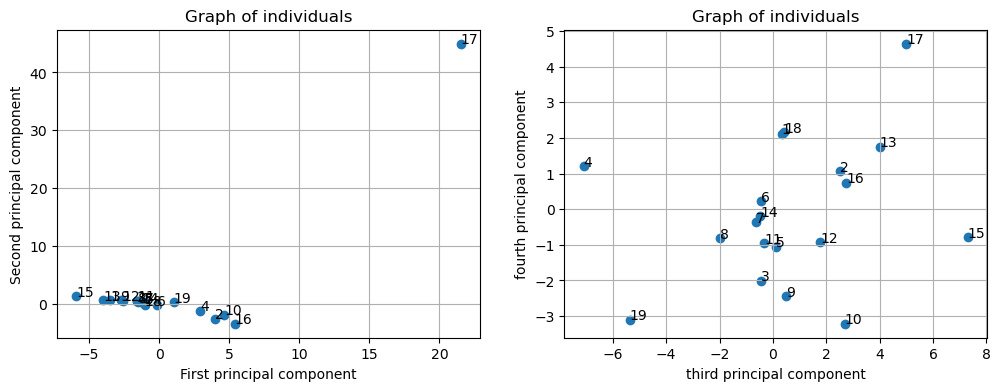

In [ ]:
plt.figure(figsize=(12, 4))
# construction of the first graph
plt.subplot(1, 2, 1)
plt.scatter(x_pca[:, 0], x_pca[:, 1])
labels = data.iloc[1:20,:].index # Utiliser les indices du DataFrame comme √©tiquettes
for i, label in enumerate(labels):
    plt.annotate(label, (x_pca[i, 0], x_pca[i, 1]))
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("Graph of individuals")
plt.grid(True)

# construction of the second graph
plt.subplot(1, 2, 2)
plt.scatter(x_pca[:, 2], x_pca[:, 3])
labels = data.iloc[1:20,:].index # Utiliser les indices du DataFrame comme √©tiquettes 
for i, label in enumerate(labels):
    plt.annotate(label, (x_pca[i, 2], x_pca[i, 3]))
plt.xlabel("third principal component")
plt.ylabel("fourth principal component")
plt.title("Graph of individuals")
plt.grid(True)

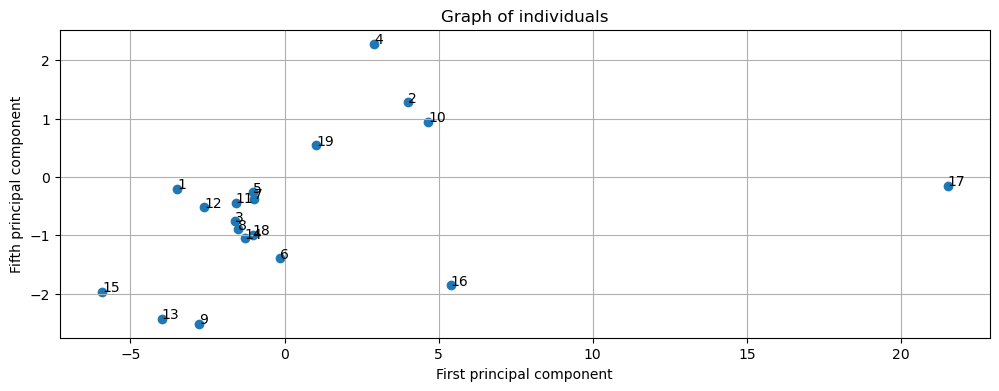

In [ ]:
#construction of the third graph 
plt.figure(figsize=(12, 4))
plt.scatter(x_pca[:, 0], x_pca[:, 4])
labels = data.iloc[1:20,:].index # Utiliser les indices du DataFrame comme √©tiquettes 
for i, label in enumerate(labels):
    plt.annotate(label, (x_pca[i, 0], x_pca[i, 4]))
plt.xlabel("First principal component")
plt.ylabel("Fifth principal component")
plt.title("Graph of individuals")
plt.grid(True)

Consid√©rons l'individu num√©ro 17. Il a un coefficient √©lev√© sur les deux premiers axes factoriels, ce qui signifie qu'il fait un grand nombre d'activit√©s par th√©matique d'apprentissage et √† de bons scores aux diff√©rentes session d'√©valuation. De plus il a un coefficient n√©gatif relativement faible sur le reste des axes factoriels, ce qui signifie qu'il a des scores peu dispers√© autour de la moyenne, il a de bonne performance acad√©mique et est plus ou moins r√©gulier aux sessions d'apprentissage. En bref, c'est un bon √©l√®ve.

Par contre, l'individu num√©ro 15 a un coefficient n√©gatif sur le premier axe factoriel, proche de 0 sur le deuxi√®me axe factoriel et n√©gatif sur le troisi√®me axe factoriel ce qui signifie qu'il ne fait relativement peu d'activit√©s par th√©matique d'apprentissage et n'a pas de bonnes performances acad√©mique. De plus, il a un coefficient n√©gatif sur le cinqui√®me axe factoriel et proche de 0 sur le quatri√®me et sixi√®me axe factoriel, ce qui traduit le fait qu'il est moin r√©gulier aux examens et ses sessions d'apprentissage sont moins concentr√©es.

<br/>
<p style="font-family: 'Georgia', serif; text-align: center;font-size: 23px">
d)- Erreur de reconstruction
</p>
<br/>

In [19]:
from sklearn.metrics import mean_squared_error
# reconstruction of the data with inverse_transform
X_reconstructed = pca.inverse_transform(X_pca)

# Calculer l'erreur de reconstruction (norme Euclidienne)
reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)

In [20]:
print(f"Erreur de reconstruction : {reconstruction_error}")

Erreur de reconstruction : 0.543519029771535


In [27]:
# Calcul de l'information mutuelle entre les donn√©es originales et reconstruites
mi_scores = [mutual_info_regression(X_scaled[:, i].reshape(-1, 1), X_reconstructed[:, i]) for i in range(X_scaled.shape[1])]
#mean_mi = np.mean([np.mean(score) for score in mi_scores])
#print(f"Information mutuelle moyenne : {mean_mi:.4f}")
total_mi = np.sum(mi_scores)
print(f"Information mutuelle totale : {total_mi:.4f}")

Information mutuelle totale : 30.0488


In [29]:
from scipy.stats import entropy
def normalized_mutual_information(X_scaled, X_reconstructed):
    H_X = np.sum([entropy(np.histogram(X_scaled[:, i], bins=20)[0] + 1e-10) for i in range(X_scaled.shape[1])])  # Entropie totale
    I_X_Xhat = total_mi # Info mutuelle
    return I_X_Xhat / H_X  # Ratio d'info conserv√©e

# Calcul du taux d'information mutuelle conserv√©e
nmi = normalized_mutual_information(X_scaled, X_reconstructed)
print(f"Part d'information conserv√©e (normalis√©e) : {nmi:.2%}")

Part d'information conserv√©e (normalis√©e) : 31.77%


<br/>
<p style="font-family: 'Georgia', serif; text-align: center;font-size: 25px">
<u>
2- Analyse Factorielle des Composantes Mixtes (FAMD) </u>
</p>
<br/>

<p>
Nous avons r√©alis√©s 5 FAMD sur les donn√©es(en R), puis nous avons export√© diff√©rents resultats int√©ressant(variance expliqu√©e, individu, variables).
</p>

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# D√©finir le chemin o√π sont stock√©s les fichiers export√©s depuis R
export_path = r"C:/Users/damso/Documents/Projet_Statistique/"

# Liste des fichiers √† importer
famd_versions = ["famd0","famd1", "famd2", "famd3", "famd_final"]

# Dictionnaires pour stocker les dataframes import√©s
coord_ind_total = {}
coord_var_total = {}
variance_total = {}

# Boucle pour importer les fichiers CSV dans des dictionnaires
for famd in famd_versions:
    coord_ind_total[famd] = pd.read_csv(os.path.join(export_path, f"{famd}_coord_ind.csv"), index_col=0)
    coord_var_total[famd] = pd.read_csv(os.path.join(export_path, f"{famd}_coord_var.csv"), index_col=0)
    variance_total[famd] = pd.read_csv(os.path.join(export_path, f"{famd}_variance.csv"), index_col=0)

# Affichage des informations importantes

print(f"\n==== R√©sultats pour famd0 ====")
print(f"Nombre d'individus: {coord_ind_total["famd0"].shape[0]}")
print(f"Nombre de variables: {coord_var_total["famd0"].shape[0]}")
print(f"Nombre de composantes: {variance_total["famd0"].shape[0]}")
print("Pourcentage de variance expliqu√©e par chaque composante:\n", variance_total["famd0"].iloc[:, 1])



==== R√©sultats pour famd0 ====
Nombre d'individus: 200000
Nombre de variables: 371
Nombre de composantes: 30
Pourcentage de variance expliqu√©e par chaque composante:
 comp 1     20.413033
comp 2      2.524357
comp 3      2.003599
comp 4      1.746728
comp 5      1.533339
comp 6      1.007631
comp 7      0.913385
comp 8      0.868160
comp 9      0.845962
comp 10     0.837021
comp 11     0.826354
comp 12     0.809997
comp 13     0.799562
comp 14     0.781710
comp 15     0.775136
comp 16     0.744219
comp 17     0.728571
comp 18     0.716312
comp 19     0.713825
comp 20     0.699645
comp 21     0.698554
comp 22     0.678189
comp 23     0.676258
comp 24     0.666379
comp 25     0.651333
comp 26     0.639637
comp 27     0.626626
comp 28     0.619195
comp 29     0.613205
comp 30     0.604893
Name: percentage of variance, dtype: float64


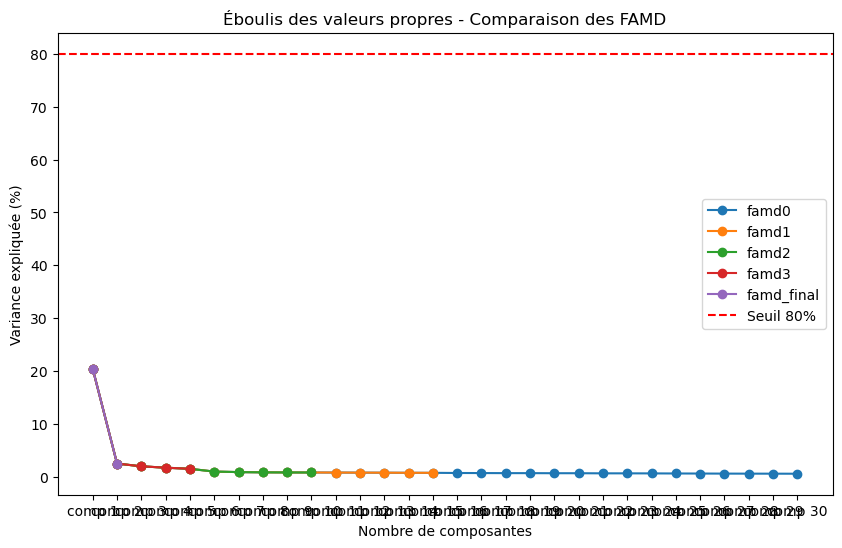

In [3]:
plt.figure(figsize=(10, 6))
for famd in famd_versions:
    plt.plot(variance_total[famd].index, variance_total[famd].iloc[:, 1], marker='o', label=famd)

plt.axhline(y=80, color='r', linestyle='--', label="Seuil 80%")
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliqu√©e (%)")
plt.title("√âboulis des valeurs propres - Comparaison des FAMD")
plt.legend()
plt.show()


## Distribution des individus dans les deux premi√®res dimensions pour chaque cas

Composante 1 et 2

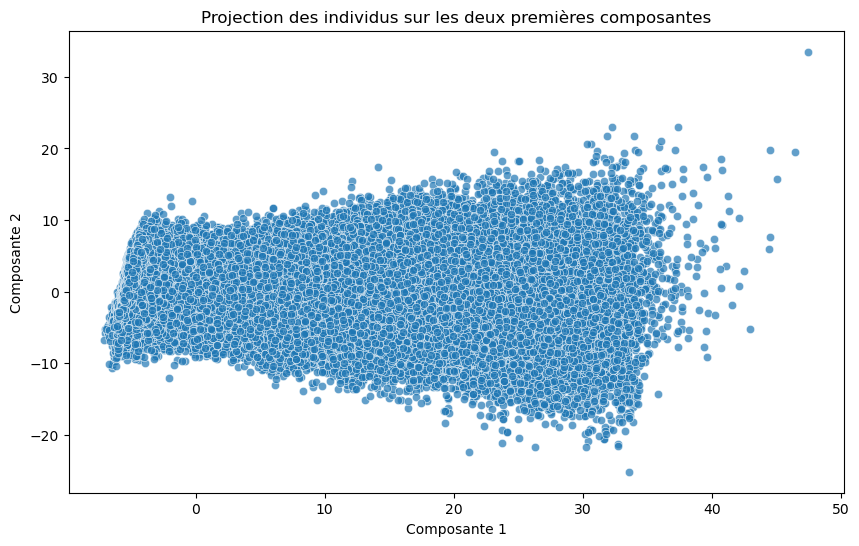

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=coord_ind_total["famd0"].iloc[:, 0], 
                y=coord_ind_total["famd0"].iloc[:, 1], 
                alpha=0.7)
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("Projection des individus sur les deux premi√®res composantes")
plt.show()

Composantes 2 et 3

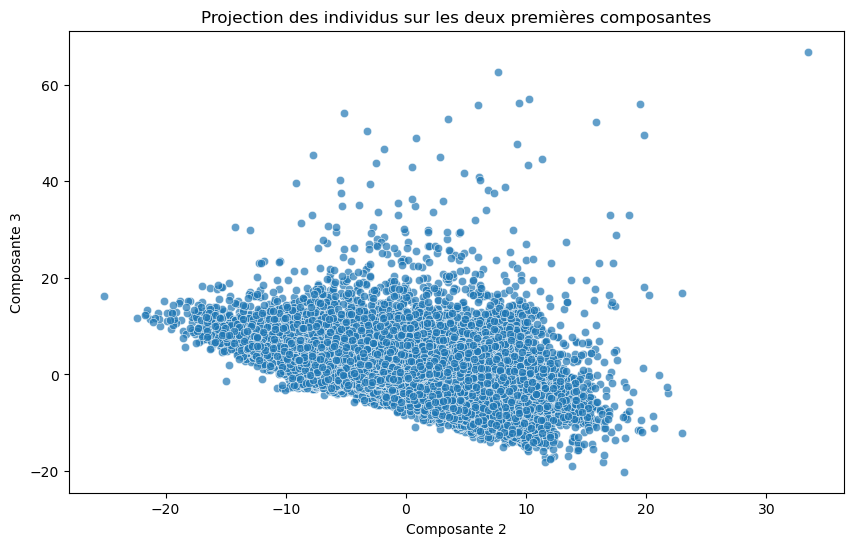

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=coord_ind_total["famd0"].iloc[:, 1], 
                y=coord_ind_total["famd0"].iloc[:, 2], 
                alpha=0.7)
plt.xlabel("Composante 2")
plt.ylabel("Composante 3")
plt.title("Projection des individus sur les deux premi√®res composantes")
plt.show()

composantes 3 et 4

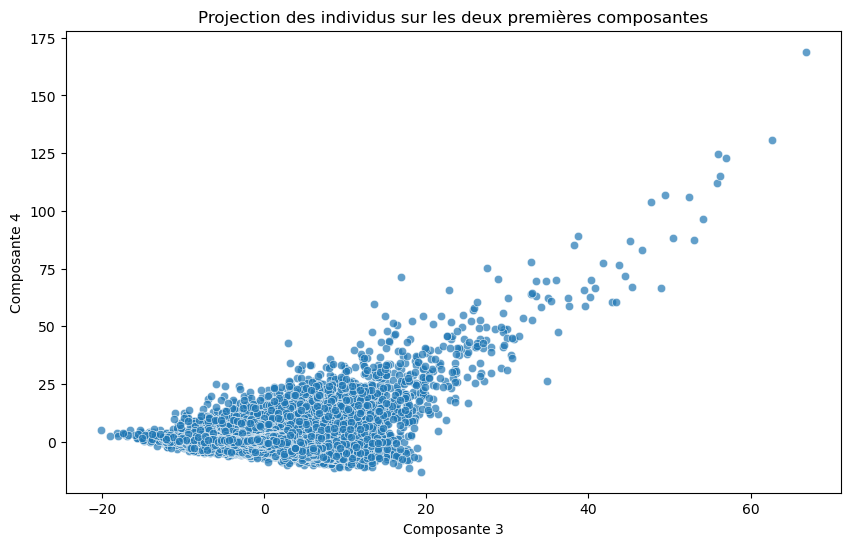

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=coord_ind_total["famd2"].iloc[:, 2], 
                y=coord_ind_total["famd2"].iloc[:, 3], 
                alpha=0.7)
plt.xlabel("Composante 3")
plt.ylabel("Composante 4")
plt.title("Projection des individus sur les deux premi√®res composantes")
plt.show()

composantes 4 et 5

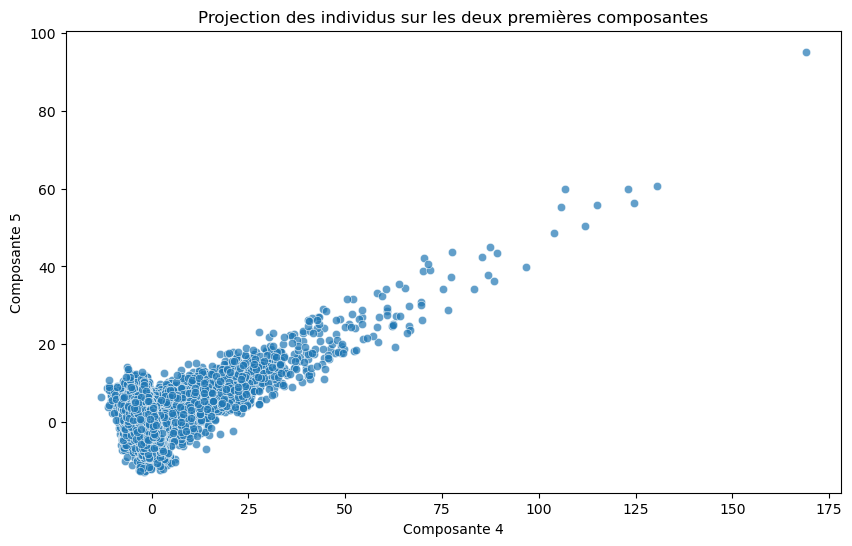

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=coord_ind_total["famd0"].iloc[:, 3], 
                y=coord_ind_total["famd0"].iloc[:, 4], 
                alpha=0.7)
plt.xlabel("Composante 4")
plt.ylabel("Composante 5")
plt.title("Projection des individus sur les deux premi√®res composantes")
plt.show()

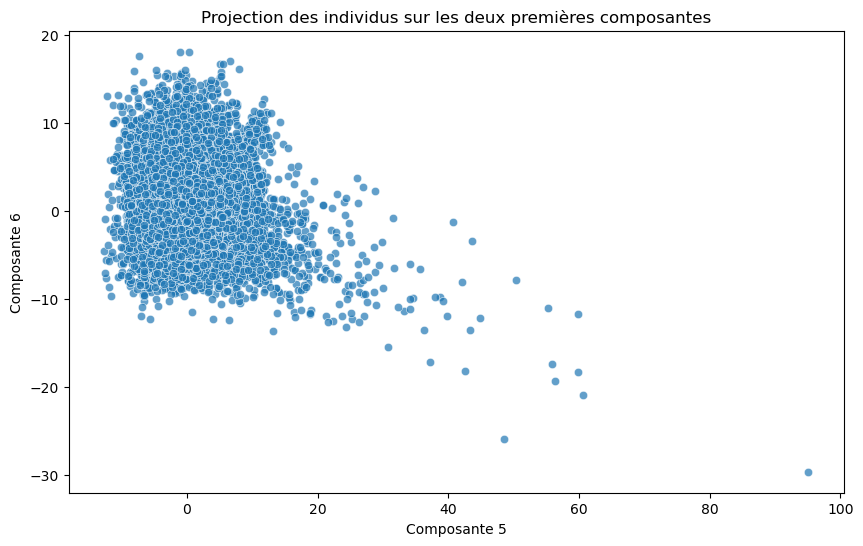

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=coord_ind_total["famd0"].iloc[:, 4], 
                y=coord_ind_total["famd0"].iloc[:, 5], 
                alpha=0.7)
plt.xlabel("Composante 5")
plt.ylabel("Composante 6")
plt.title("Projection des individus sur les deux premi√®res composantes")
plt.show()


<br/>
L'√©volution des distributions obtenue par la r√©duction des dimensions via la FAMD (Factorial Analysis of Mixed Data) peut √™tre interpr√©t√©e √† travers plusieurs aspects cl√©s :

### 1. **Projection des individus**
Les graphiques montrent la projection d'individus sur les premi√®res composantes principales, ce qui permet de visualiser la structure sous-jacente des donn√©es. Chaque point repr√©sente un individu, et leur disposition dans le plan r√©v√®le des tendances et des regroupements.

### 2. **Dispersion des points**
- **Premier graphique :** Les points sont relativement dispers√©s, indiquant une diversit√© dans les donn√©es. La forme globale peut sugg√©rer des groupes potentiels.
- **Deuxi√®me graphique :** La concentration des points reste similaire, mais on peut observer une l√©g√®re tendance √† une distribution plus lin√©aire.
- **Troisi√®me graphique :** Une tendance plus marqu√©e appara√Æt, avec une augmentation des points dans une direction particuli√®re, indiquant potentiellement un gradient ou une corr√©lation entre certaines variables.
- **Quatri√®me graphique :** La projection montre une distribution similaire, mais sur un autre axe, ce qui pourrait signaler des relations entre diff√©rentes dimensions.
- **Cinqui√®me graphique :** La concentration des points dans cette projection sugg√®re qu'il y a des variables qui partagent une relation commune.

### 3. **Interpr√©tation des axes**
Les axes des graphiques (composantes 1, 2, 3, etc.) repr√©sentent des combinaisons lin√©aires des variables originales. L'interpr√©tation de ces axes d√©pend des variables qui les composent. Une analyse plus approfondie des contributions des variables aux composantes peut r√©v√©ler quelles variables sont les plus influentes dans la formation de ces groupes.

### 4. **Observations globales**
- **Tendances lin√©aires :** L'apparition de tendances lin√©aires dans plusieurs graphiques peut indiquer des relations corr√©latives parmi certaines variables.

En r√©sum√©, cette s√©rie de graphiques permet de visualiser la structure des donn√©es apr√®s r√©duction de dimensions, mettant en lumi√®re des tendances et des relations potentielles parmi les individus observ√©s. 
<br/>
<br/>


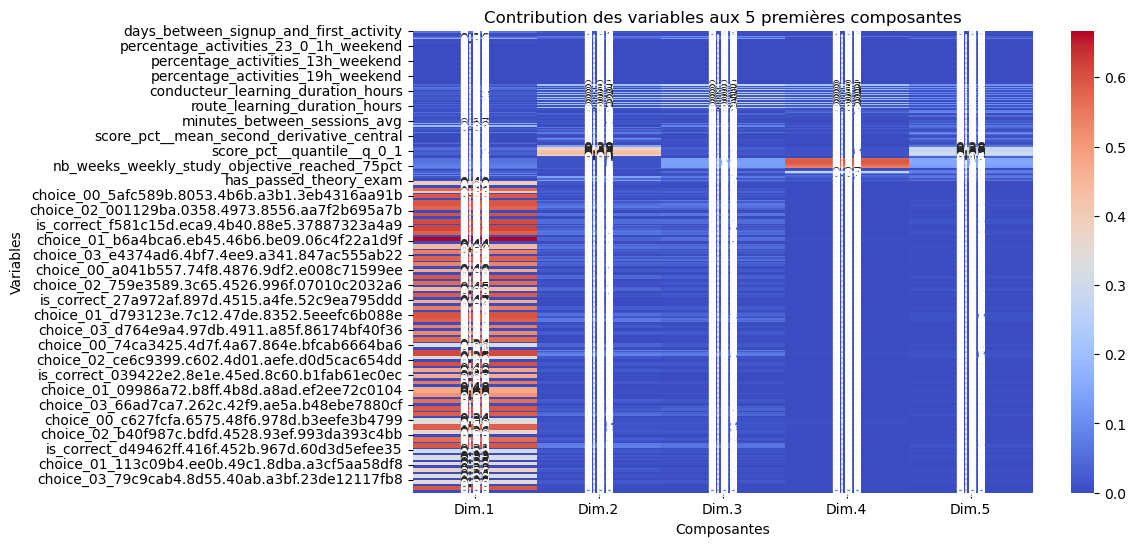

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(coord_var_total["famd0"].iloc[:, :5], cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Contribution des variables aux 5 premi√®res composantes")
plt.xlabel("Composantes")
plt.ylabel("Variables")
plt.show()


Le graphique que vous avez partag√© semble repr√©senter la contribution des variables aux cinq premi√®res composantes principales r√©sultant d'une analyse FAMD. Voici une interpr√©tation d√©taill√©e :

### 1. **Structure du graphique**
- **Axes :** L'axe des abscisses repr√©sente les cinq premi√®res composantes (Dim 1 √† Dim 5), tandis que l'axe des ordonn√©es liste les diff√©rentes variables analys√©es.
- **Coloration :** Les couleurs (typiquement des nuances de bleu et de rouge) indiquent l'ampleur de la contribution des variables √† chaque composante. G√©n√©ralement, les couleurs plus fonc√©es ou plus satur√©es signalent une contribution plus importante.

### 2. **Interpr√©tation des contributions**
- **Variables significatives :** Les variables qui montrent une couleur plus intense (bleu fonc√©, par exemple) pour une composante donn√©e sont celles qui contribuent le plus √† cette composante. Cela signifie qu'elles capturent une grande partie de la variance expliqu√©e par cette composante.
- **Distribution des contributions :** En examinant chaque composante, vous pouvez identifier quelles variables ont un impact positif ou n√©gatif. Par exemple, si une variable a une forte contribution positive sur Dim 1, elle influence fortement cette dimension dans le sens positif.

### 3. **Identification des tendances**
- **Composantes principales :** Les premi√®res composantes (Dim 1 et Dim 2) sont souvent les plus importantes, car elles capturent la majorit√© de la variance. Si certaines variables sont fortement associ√©es √† ces dimensions, elles m√©ritent une attention particuli√®re dans l'analyse.
- **Variabilit√© entre dimensions :** En observant les contributions √† travers plusieurs dimensions, on peut voir si certaines variables sont constantes dans leur influence ou si elles changent significativement d'une dimension √† l'autre.

### 4. **Implications pour l'analyse**
- **Focus sur les variables cl√©s :** Les variables qui contribuent le plus aux premi√®res composantes peuvent √™tre des cibles prioritaires pour des analyses plus approfondies, des visualisations ou des d√©cisions strat√©giques.
- **Exploration de corr√©lations :** Certaines variables peuvent montrer des contributions oppos√©es sur diff√©rentes dimensions, ce qui peut indiquer des relations complexes entre elles.


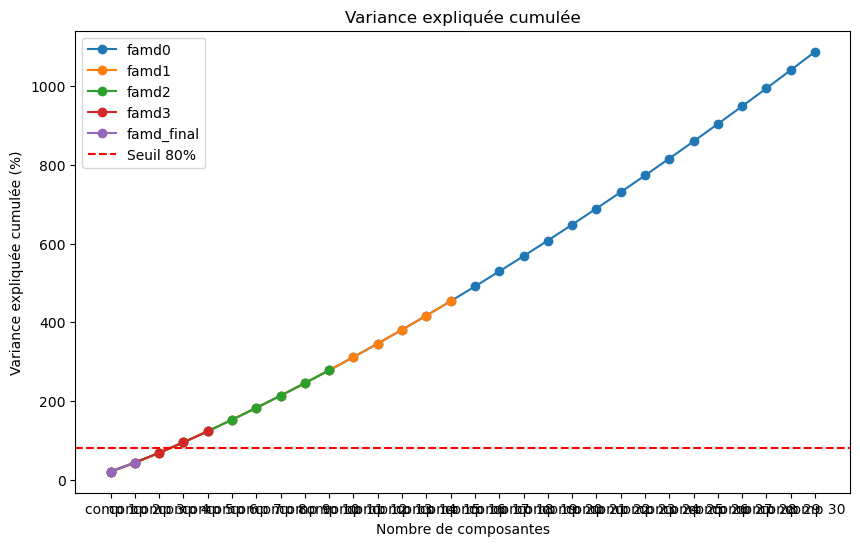

In [6]:
plt.figure(figsize=(10, 6))
for famd in famd_versions:
    plt.plot(variance_total[famd].index, variance_total[famd].iloc[:, 2].cumsum(), marker='o', label=famd)

plt.axhline(y=80, color='r', linestyle='--', label="Seuil 80%")
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliqu√©e cumul√©e (%)")
plt.title("Variance expliqu√©e cumul√©e")
plt.legend()
plt.show()


Plus le nombre de dimension est elev√©, plus  la variance cumul√©e expliqu√©e est √©lev√©.

Le graphique que vous avez partag√© repr√©sente la variance expliqu√©e cumul√©e par les diff√©rentes composantes principales r√©sultant d'une analyse FAMD. Voici une interpr√©tation d√©taill√©e :

### 1. **Structure du graphique**
- **Axes :** L'axe des abscisses repr√©sente le nombre de composantes, tandis que l'axe des ordonn√©es indique la variance expliqu√©e cumul√©e (en pourcentage).
- **Curves color√©es :** Chaque courbe repr√©sente une s√©rie de donn√©es (fam0, fam1, fam2, fam3, fam_final), montrant comment la variance expliqu√©e √©volue avec l'ajout de chaque composante.

### 2. **Interpr√©tation de la variance expliqu√©e**
- **Variance expliqu√©e cumul√©e :** Le graphique montre comment la somme des variances expliqu√©es augmente avec le nombre de composantes. Une courbe qui s'√©l√®ve rapidement au d√©but indique que les premi√®res composantes capturent une grande partie de la variance.
- **Seuil de variance :** La ligne rouge (seuil) peut repr√©senter un niveau minimal de variance que l'on souhaite atteindre pour retenir un nombre optimal de composantes. Par exemple, si ce seuil est fix√© √† 70%, on peut d√©terminer combien de composantes sont n√©cessaires pour atteindre ce niveau.

### 3. **Tendances observ√©es**
- **Comportement des courbes :** Si certaines courbes atteignent le seuil de variance plus t√¥t que d'autres, cela indique que les variables associ√©es √† ces courbes sont plus efficaces pour expliquer la variance dans le jeu de donn√©es.
- **√âquilibre entre complexit√© et performance :** Si une courbe montre une pente plus douce apr√®s un certain nombre de composantes, cela peut sugg√©rer qu'ajouter d'autres composantes n'apporte qu'un faible gain en termes de variance expliqu√©e.



<h2>
Informations sur les dimensions(composantes) conserv√©es
</h2>

In [25]:
variance_total["famd0"]

eigenvalue  percentage of variance  cumulative percentage of variance
comp 1    92.062778               20.413033                          20.413033
comp 2    11.384850                2.524357                          22.937390
comp 3     9.036232                2.003599                          24.940989
comp 4     7.877744                1.746728                          26.687717
comp 5     6.915358                1.533339                          28.221056
comp 6     4.544415                1.007631                          29.228686
comp 7     4.119365                0.913385                          30.142071
comp 8     3.915400                0.868160                          31.010231
comp 9     3.815290                0.845962                          31.856193
comp 10    3.774965                0.837021                          32.693214
comp 11    3.726858                0.826354                          33.519568
comp 12    3.653088                0.809997                          34.329566
comp 13    3.606027                0.799562                          35.129128
comp 14    3.525513                0.781710                          35.910839
comp 15    3.495863                0.775136                          36.685974
comp 16    3.356429                0.744219                          37.430194
comp 17    3.285856                0.728571                          38.158765
comp 18    3.230569                0.716312                          38.875077
comp 19    3.219351                0.713825                          39.588903
comp 20    3.155398                0.699645                          40.288547
comp 21    3.150477                0.698554                          40.987101
comp 22    3.058632                0.678189                          41.665290
comp 23    3.049922                0.676258                          42.341548
comp 24    3.005367                0.666379                          43.007926
comp 25    2.937511                0.651333                          43.659259
comp 26    2.884764                0.639637                          44.298896
comp 27    2.826083                0.626626                          44.925522
comp 28    2.792569                0.619195                          45.544717
comp 29    2.765555                0.613205                          46.157922
comp 30    2.728067                0.604893                          46.762815

 <b> les deux premi√®res  dimensions, qui contiennent des informations sur 372 variables(de "days_between_signup_and_first_activity" √† "unique_learner_id") et expliquent  22,93% environ de la variance totale. √† partir de 7 composantes nous avons 30% de variance expliqu√©e</b>

[20.41303277  2.52435693  2.00359905  1.74672813  1.5333388   1.00763073
  0.91338463  0.86815964  0.84596238  0.83702106  0.82635435  0.80999738
  0.79956242  0.78171026  0.77513592  0.74421931  0.72857128  0.71631246
  0.71382505  0.69964476  0.69855368  0.67818902  0.67625774  0.66637854
  0.65133271  0.63963715  0.62662602  0.61919498  0.61320504  0.60489292]
üîπ Nombre optimal de dimensions pour famd1 selon la m√©thode de Kaiser = 6


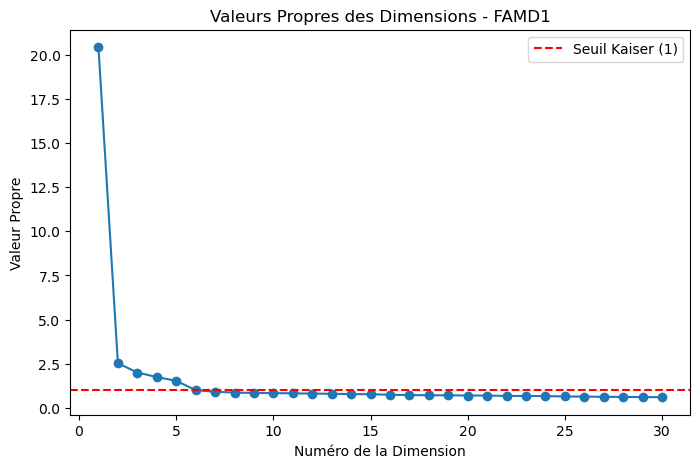

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Extraire les valeurs propres de famd1 (premi√®re colonne)
eigenvalues = np.array(variance_total["famd0"].iloc[:, 1])  # Prend bien la variance brute
print(eigenvalues)
# M√©thode de Kaiser : garder les composantes avec variance > 1
optimal_dimensions = np.sum(eigenvalues > 1)

print(f"üîπ Nombre optimal de dimensions pour famd1 selon la m√©thode de Kaiser = {optimal_dimensions}")

# Tracer les valeurs propres
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.axhline(y=1, color='red', linestyle='--', label='Seuil Kaiser (1)')
plt.title("Valeurs Propres des Dimensions - FAMD1")
plt.xlabel("Num√©ro de la Dimension")
plt.ylabel("Valeur Propre")
plt.legend()
plt.show()


<h2> La m√©thode de Kaiser nous sugg√®re via ce graphique de ne conserver que les 6 premi√®res 1<sup>ere</sup> composantes
</h2>

<br/>
<p style="font-family: 'Georgia', serif; text-align: center;font-size: 25px">
<u>
3- Auto Encoder </u>
</p>
<br/>

Nous commencons d'abord par exclure les identifiants ainsi que la variable de type datetime de la base qui ne pr√©sentent aucun int√©r√™t pour notre auto encoder

Pour des raisons li√©es √† la puissance de calcul, nous nous servirons de 30000 observations pour notre Auto-Encoder. 

In [ ]:
base_AE=base_Edu.select_dtypes(exclude="datetime").drop(columns="unique_learner_id",axis=1).head(30000)

Le calibrage des hyperparam√®tres tels que le nombre de couche, les fonctions d'activations, le type de normalisation est d√©taill√© dans l'annexe du fichier AutoEncoder. Ont √©t√© retenus les hyperparam√®tre suivant : 
* Type de normalisation : MinMax
* Nombre de couche : Une couche cach√© en encdeur et au niveau du d√©codeur
* Fonctions d'activation : **Linear** dans les couches de l'encodeur et **sigmoid** en d√©codeur 

Nous nous concentrerons donc maintenant sure le choix de la dimension latente. 

### Choix du Nombre Optimal de Dimensions Latentes pour un Autoencodeur : Une Analyse Bas√©e sur l‚ÄôInformation Mutuelle
Dans le cadre de la r√©duction de dimension √† l‚Äôaide d‚Äôun autoencodeur, l‚Äôun des d√©fis majeurs consiste √† choisir un nombre optimal de dimensions latentes permettant d‚Äôatteindre un compromis entre compacit√© de la repr√©sentation et pr√©servation de l‚Äôinformation essentielle. Pour guider ce choix, nous nous appuyons sur une mesure cl√© : l‚Äôinformation mutuelle.

L‚Äôinformation mutuelle est une mesure issue de la th√©orie de l‚Äôinformation qui quantifie la d√©pendance entre deux ensembles de variables. Plus pr√©cis√©ment, dans notre contexte, elle permet d‚Äô√©valuer dans quelle mesure les variables latentes conservent l‚Äôinformation contenue dans les variables d‚Äôorigine. Formellement, l‚Äôinformation mutuelle entre deux variables al√©atoires $(X)$ et $(Z)$ est donn√©e par :


$I(X,Z) = \sum_{x \in X} \sum_{z \in Z} P(x, z) \log \frac{P(x, z)}{P(x) P(z)}$

o√π $(P(x, z))$ est la distribution conjointe de $(X)$ et $(Z)$, et $(P(x))$, $(P(z))$ sont leurs distributions marginales respectives.

Dans le contexte d‚Äôun autoencodeur, cette mesure nous permet de quantifier la capacit√© des dimensions latentes √† encoder efficacement l‚Äôinformation contenue dans les donn√©es initiales. Une information mutuelle √©lev√©e signifie que la repr√©sentation latente conserve beaucoup d‚Äôinformation sur les donn√©es originales, tandis qu‚Äôune information mutuelle faible sugg√®re une perte d‚Äôinformation plus importante.


657/657 [==============================] - 2s 3ms/step


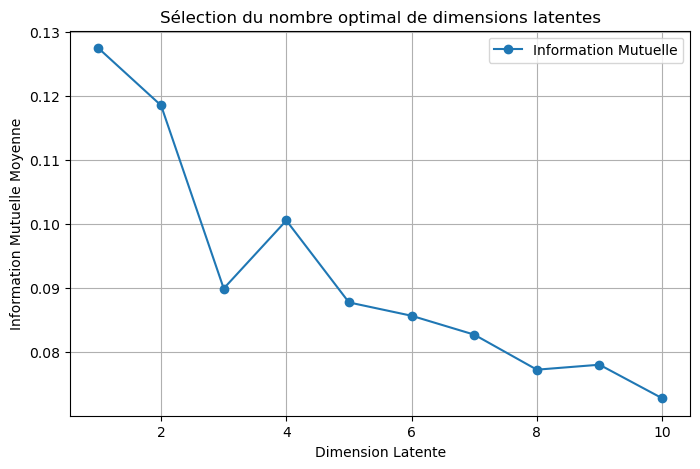

In [ ]:
import numpy as np
import tensorflow as tf
import random
import pandas as pd
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import os

# === 1. Fixer les graines pour la reproductibilit√© ===
seed_value = 123
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ['PYTHONHASHSEED'] = str(seed_value)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# === 2. Pr√©paration des donn√©es ===
numerical_cols = base_AE.select_dtypes(include=['int', 'float']).columns
categorical_cols = base_AE.select_dtypes(include=['category', 'object']).columns

encoder = OneHotEncoder(sparse_output=False)
encoded_cats = encoder.fit_transform(base_AE[categorical_cols])
encoded_cat_columns = encoder.get_feature_names_out(categorical_cols)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_nums = scaler.fit_transform(base_AE[numerical_cols])

final_data = np.hstack([encoded_cats, scaled_nums])
final_columns = list(encoded_cat_columns) + list(numerical_cols)

x_train, x_test = train_test_split(final_data, test_size=0.3, random_state=seed_value)
input_dim = x_train.shape[1]
initializer = tf.keras.initializers.GlorotUniform(seed=seed_value)

# === 3. Tester diff√©rentes dimensions latentes et calculer l'information mutuelle ===
mutual_info_scores = []
latent_dims = range(1, 11)

for encoding_dim in latent_dims:
    input_img = Input(shape=(input_dim,))
    Hidden1 = Dense(350, activation='linear', kernel_initializer=initializer)(input_img)
    encoded = Dense(encoding_dim, activation='linear', kernel_initializer=initializer)(Hidden1)
    Hidden_output1 = Dense(350, activation='sigmoid', kernel_initializer=initializer)(encoded)
    decoded = Dense(input_dim, activation='sigmoid', kernel_initializer=initializer)(Hidden_output1)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test), verbose=0)
    
    encoder_model = Model(input_img, encoded)
    encoded_imgs = encoder_model.predict(x_train)
    
    mi_scores = np.array([
        np.mean([mutual_info_regression(x_train[:, j].reshape(-1, 1), encoded_imgs[:, i]) 
                 for j in range(x_train.shape[1])])
        for i in range(encoding_dim)
    ])
    
    mutual_info_scores.append(np.mean(mi_scores))

# === 4. Tracer la courbe de l'information mutuelle ===
plt.figure(figsize=(8, 5))
plt.plot(latent_dims, mutual_info_scores, marker='o', linestyle='-', label="Information Mutuelle")
plt.xlabel("Dimension Latente")
plt.ylabel("Information Mutuelle Moyenne")
plt.title("S√©lection du nombre optimal de dimensions latentes")
plt.legend()
plt.grid()
plt.show()


L‚Äôanalyse de la courbe obtenue montre une tendance g√©n√©rale d√©croissante de l‚Äôinformation mutuelle lorsque le nombre de dimensions latentes augmente. Cela est attendu, car en r√©duisant la dimensionnalit√©, nous √©liminons progressivement certaines redondances mais aussi, potentiellement, des informations pertinentes.

Cependant, une observation plus fine r√©v√®le que :

* Entre 1 et 5 dimensions, l‚Äôinformation mutuelle diminue de mani√®re marqu√©e mais non lin√©aire.
* √Ä partir de 5 dimensions, la d√©croissance devient plus progressive et r√©guli√®re.
* L‚Äôajout de dimensions au-del√† de 5 n‚Äôapporte qu‚Äôun gain marginal en information mutuelle, sugg√©rant que l‚Äôinformation restante est soit moins pertinente, soit redondante.

Nous choissons donc la valeur 5 pour la dimension de l'espace latent. 

Ce choix garantit un √©quilibre optimal entre compression et pr√©servation d‚Äôinformation, permettant ainsi d‚Äôassurer une repr√©sentation efficace et compacte des donn√©es tout en √©vitant des dimensions inutiles.

L‚Äô√©tape suivante consiste √† valider ce choix √† l‚Äôaide de l‚Äôerreur de reconstruction, pour s‚Äôassurer que l‚Äôinformation captur√©e par ces 5 dimensions latentes est suffisante pour une bonne qualit√© de reconstruction des donn√©es originales.

In [2]:
import numpy as np
import tensorflow as tf
import random
import pandas as pd
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import os

# === 1. Fixer les graines pour la reproductibilit√© ===
seed_value = 123
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ['PYTHONHASHSEED'] = str(seed_value)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# === 2. Pr√©paration des donn√©es ===
# R√©cup√©rer les colonnes num√©riques et cat√©goriques
numerical_cols = base_AE.select_dtypes(include=['int', 'float']).columns
categorical_cols = base_AE.select_dtypes(include=['category', 'object']).columns

# Encodage des variables cat√©goriques avec OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_cats = encoder.fit_transform(base_AE[categorical_cols])

# R√©cup√©rer les noms des colonnes g√©n√©r√©es par OneHotEncoder
encoded_cat_columns = encoder.get_feature_names_out(categorical_cols)

# Centrage et r√©duction des variables num√©riques
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_nums = scaler.fit_transform(base_AE[numerical_cols])

# Fusionner les donn√©es encod√©es et normalis√©es
final_data = np.hstack([encoded_cats, scaled_nums])

# Concat√©ner les noms des colonnes finales
final_columns = list(encoded_cat_columns) + list(numerical_cols)

# Diviser les donn√©es en ensembles d'entra√Ænement et de test
x_train, x_test = train_test_split(final_data, test_size=0.3, random_state=seed_value)

# Dimensions de l'entr√©e
#input_dim = x_train.shape[1]

# === 2. D√©finition de l'autoencodeur ===
input_dim = x_train.shape[1]  # Assurez-vous que x_train est bien d√©fini
encoding_dim = 5

# Initialisation d√©terministe des poids
initializer = tf.keras.initializers.GlorotUniform(seed=seed_value)

# Encodeur
Hidden1 = Dense(350, activation='linear', kernel_initializer=initializer)(input_img)
#Hidden2 = Dense(128, activation='relu', kernel_initializer=initializer)(Hidden1)
#Hidden3 = Dense(64, activation='relu', kernel_initializer=initializer)(Hidden2)
encoded = Dense(encoding_dim, activation='linear', kernel_initializer=initializer)(Hidden1)

# D√©codeur
Hidden_output1 = Dense(350, activation='sigmoid', kernel_initializer=initializer)(encoded)
#Hidden_output2 = Dense(128, activation='relu', kernel_initializer=initializer)(Hidden_output1)
#Hidden_output3 = Dense(256, activation='relu', kernel_initializer=initializer)(Hidden_output2)
decoded = Dense(input_dim, activation='sigmoid', kernel_initializer=initializer)(Hidden_output1)#Plus touche

# Mod√®le autoencodeur
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Entra√Ænement du mod√®le
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test),
                          verbose=1)

# Mod√®le de l'encodeur seul
encoder = Model(input_img, encoded)

# Repr√©sentations encod√©es (latent space)
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# === 4. Visualisation des performances ===
n = 7
plt.figure(figsize=(20, 4))

for i in range(n):
    # Donn√©es originales
    ax = plt.subplot(2, n, i + 1)
    plt.bar(range(len(x_test[i])), x_test[i])
    plt.title(f"Original {i+1}")
    plt.axis('off')

    # Reconstructions
    ax = plt.subplot(2, n, i + 1 + n)
    plt.bar(range(len(decoded_imgs[i])), decoded_imgs[i])
    plt.title(f"Reconstructed {i+1}")
    plt.axis('off')

plt.show()

# Analyse des erreurs de reconstruction
reconstruction_error = np.mean((x_test - decoded_imgs) ** 2, axis=1)
print(f"Erreur moyenne de reconstruction : {np.mean(reconstruction_error):.4f}")


NameError: name 'base_AE' is not defined

Nous obtenons une erreur de reconstruction √©gale √† 0.0328. Ce qui indique que l'autoencodeur parvient √† reconstruire les donn√©es d'origine avec une pr√©cision raisonnable. Nous maintenons donc 5 comme dimension de l'espace latent. 

Aussi Le graphique pr√©c√©dent fait une comparaison entre les 7 premi√®res donn√©es originales et leurs versions reconstruites (pour une dimension k=5 de l'espace latent). Et la ressemblence oberv√©e est tr√®s forte. Cela t√©moigne du fait que la valeur k=5 de l'hyperparam√®tre suffit √† capturer efficacement la structure initiale de nos donn√©es. 

Nous allons maintenant passer √† l'interpr√©tation des nos 5 variables latentes. Mais pour le faire il nous faut savoir quelles variables d'origines ont plus d'influence sur chacun des variables latentes. Pour capturer cette information, nous utiliserons la m√©thode GradiantExplainer de la biblioth√®que shap qui nous donnera une approximation de l'effet d'une pertubation √©l√©mentaire de chacune des variables d'origine suer chacune des variables latentes. Ce effet sera utiliser pour d√©terminer quelles variables de d√©part influencent le plus quelle variable latente 

In [ ]:
import shap

# === 2. SHAP pour l'analyse des variables d'origine ===
# Adaptation du mod√®le pour SHAP ===
# Le mod√®le doit inclure les couches d'entr√©e jusqu'√† l'encodage
#explainer = shap.DeepExplainer(encoder, x_train)  # Sous-√©chantillon de r√©f√©rence
explainer = shap.GradientExplainer(encoder, x_train)
# === 2. R√©cup√©rer les valeurs SHAP pour les donn√©es de test ===
shap_values = explainer.shap_values(x_test)  # Analyser un sous-√©chantillon de test

In [ ]:
# # V√©rification de la structure des valeurs SHAP
# print(f"Shape of shap_values: {len(shap_values)} dimensions latentes.")
# print(f"Shape of shap_values for first latent variable: {shap_values[0].shape}")
# print(f"Shape of x_test: {x_test.shape}")
# print(np.shape(shap_values))

In [ ]:
import pandas as pd

# Pour chaque dimension latente
for i in range(5):  # 10 dimensions latentes
    shap_val = shap_values[:, :, i]  # Valeurs SHAP pour la i-√®me dimension latente (9000, 724)
    
    # Cr√©er un DataFrame des valeurs SHAP pour les variables d'origine
    shap_df = pd.DataFrame(shap_val, columns=final_columns)  # Colonnes correspondant aux variables d'origine
    
    # Calcul de l'importance moyenne de chaque variable d'entr√©e pour cette dimension latente
    mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)  # Moyenne des valeurs absolues
    print(f"Les variables les plus influentes pour la {i+1}-√®me dimension latente:")
    print(mean_shap_values.head(10))  # Afficher les 5 variables les plus influentes pour la dimension latente i+1


Les variables les plus influentes pour la 1-√®me dimension latente:
is_first_exam_success_1                              4.033124
is_first_exam_success_2                              2.977121
pct_no_objective_weeks                               2.670113
pct_study_objective_not_reached                      2.494268
choice_01_b6a4bca6-eb45-46b6-be09-06c4f22a1d9f_1     2.286206
choice_00_b6a4bca6-eb45-46b6-be09-06c4f22a1d9f_1     2.266252
prendre_quitter_vehicule_number_of_activities        1.855797
has_passed_theory_exam_1                             1.825285
autres_usagers_number_of_activities                  1.779124
is_correct_b6a4bca6-eb45-46b6-be09-06c4f22a1d9f_1    1.730351
dtype: float64
Les variables les plus influentes pour la 2-√®me dimension latente:
choice_02_d793123e-7c12-47de-8352-5eeefc6b088e_0     3.502550
is_correct_d793123e-7c12-47de-8352-5eeefc6b088e_0    3.447411
choice_03_d793123e-7c12-47de-8352-5eeefc6b088e_0     3.391110
is_first_exam_success_1                    

La sortie pr√©c√©dente donne pour chacune des variables de la dimension latente les variables d'origine les plus influentes. Mais cette sortie serait plus int√©ressante sous forme de graphique.

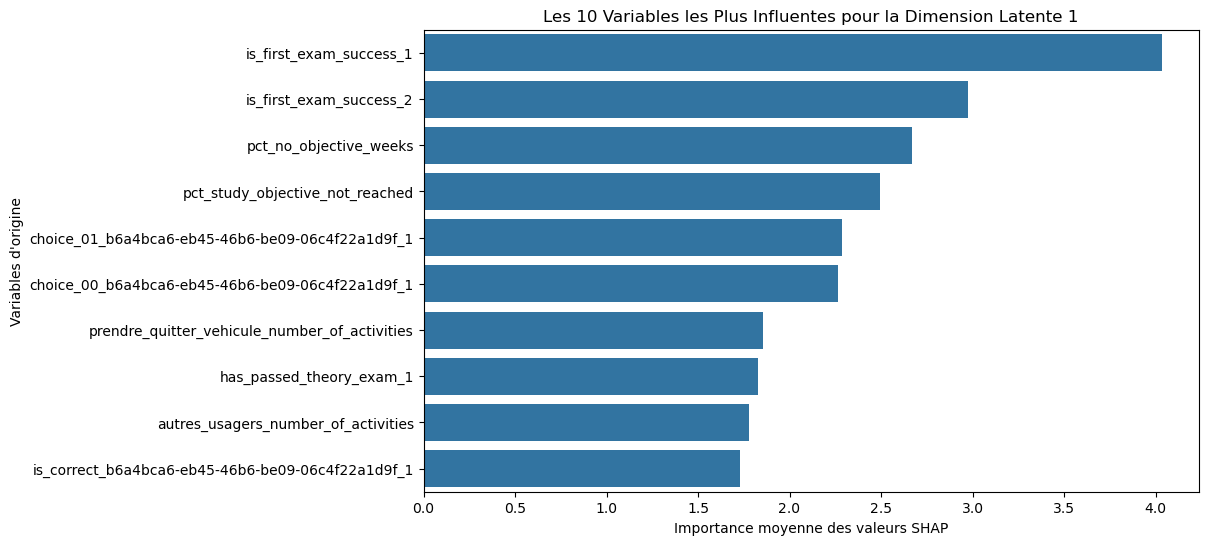

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pour chaque dimension latente
i=0 # dimensions latentes
shap_val = shap_values[:, :, i]  # Valeurs SHAP pour la i-√®me dimension latente (9000, 724)
    
# Cr√©er un DataFrame des valeurs SHAP pour les variables d'origine
shap_df = pd.DataFrame(shap_val, columns=final_columns)  # Colonnes correspondant aux variables d'origine
    
# Calcul de l'importance moyenne de chaque variable d'entr√©e pour cette dimension latente
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)  # Moyenne des valeurs absolues
    
# Affichage des 5 variables les plus influentes sous forme de barplot horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_shap_values.head(10).values, y=mean_shap_values.head(10).index, orient='h')  # Orient√© horizontalement
plt.title(f"Les 10 Variables les Plus Influentes pour la Dimension Latente {i+1}")
plt.xlabel("Importance moyenne des valeurs SHAP")
plt.ylabel("Variables d'origine")
plt.show()


Cette dimension refl√®te la **pr√©paration du candidat** et ses **performances initiales** dans le cadre de l'examen de permis. Les variables cl√©s sont :

* **R√©ussite au premier examen** (is_first_exam_success_1, is_first_exam_success_2) : Indique si le candidat a r√©ussi son premier examen.  
* **Manque d'objectifs d‚Äô√©tude** (pct_no_objective_weeks) : Montre si le candidat n'a pas d'objectifs clairs pendant sa pr√©paration.  
* **Objectifs d‚Äô√©tude non atteints** (pct_study_objective_not_reached) : Mesure les objectifs d‚Äô√©tude non r√©alis√©s.  
* **R√©ponses aux questions d'examen** (choice_01_..., choice_00_...) : Indique les r√©ponses correctes ou incorrectes aux questions.  
* **Activit√©s pratiques de conduite** (prendre_quitter_vehicule_number_of_activities) : Nombre d'activit√©s pratiques r√©alis√©es.  
* **R√©ussite √† l'examen th√©orique** (has_passed_theory_exam_1) : Indique si le candidat a r√©ussi l'examen th√©orique.  
* **Interactions avec d'autres usagers** (autres_usagers_number_of_activities) : Mesure l'exp√©rience avec d'autres conducteurs.

La dimension √©value **la pr√©paration et la r√©ussite initiale** du candidat, en tenant compte de ses performances th√©oriques et pratiques, ainsi que de son engagement dans la pr√©paration.


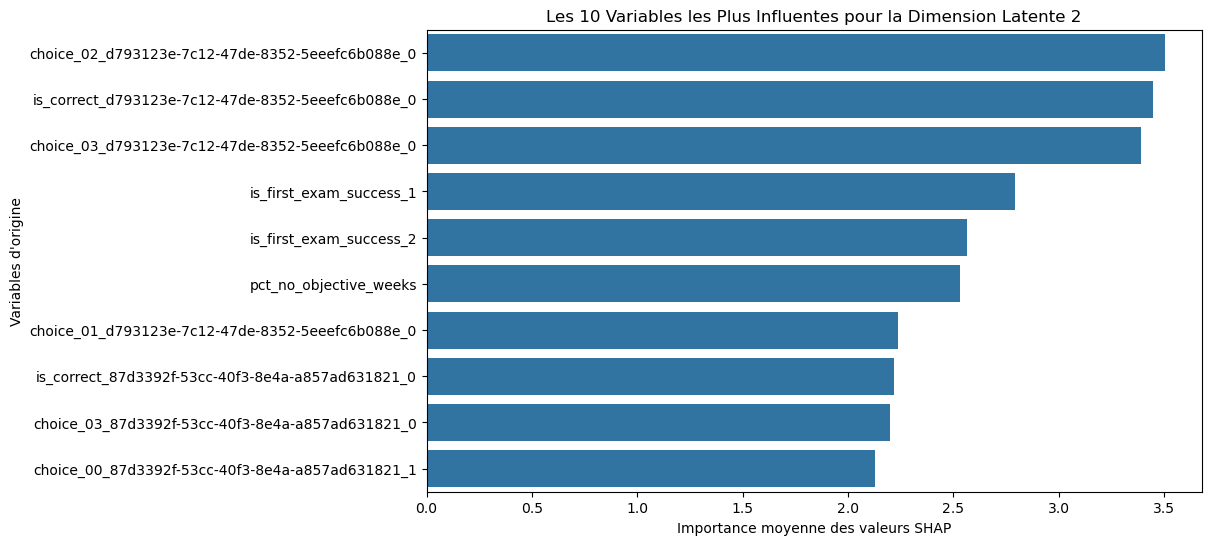

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pour chaque dimension latente
i=1 # dimensions latentes
shap_val = shap_values[:, :, i]  # Valeurs SHAP pour la i-√®me dimension latente (9000, 724)
    
# Cr√©er un DataFrame des valeurs SHAP pour les variables d'origine
shap_df = pd.DataFrame(shap_val, columns=final_columns)  # Colonnes correspondant aux variables d'origine
    
# Calcul de l'importance moyenne de chaque variable d'entr√©e pour cette dimension latente
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)  # Moyenne des valeurs absolues
    
# Affichage des 5 variables les plus influentes sous forme de barplot horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_shap_values.head(10).values, y=mean_shap_values.head(10).index, orient='h')  # Orient√© horizontalement
plt.title(f"Les 10 Variables les Plus Influentes pour la Dimension Latente {i+1}")
plt.xlabel("Importance moyenne des valeurs SHAP")
plt.ylabel("Variables d'origine")
plt.show()


Cette dimension semble √©valuer la **compr√©hension th√©orique** du candidat ainsi que sa **r√©action aux questions sp√©cifiques** du test. Les variables les plus influentes sont :

* **R√©ponses incorrectes aux questions sp√©cifiques** (choice_02_..., choice_03_...) : Ces variables montrent les mauvaises r√©ponses donn√©es aux questions du test. Cela refl√®te des **difficult√©s th√©oriques** ou un manque de pr√©paration pour certains types de questions.
* **Exactitude des r√©ponses sp√©cifiques** (is_correct_...) : Indique si les r√©ponses aux questions sp√©cifiques √©taient correctes ou non, ce qui montre l‚Äô**exactitude** du candidat dans la compr√©hension th√©orique.
* **R√©ussite au premier examen** (is_first_exam_success_1, is_first_exam_success_2) : Bien que d√©j√† mentionn√©e, ici elle peut refl√©ter la **compr√©hension th√©orique** du candidat, surtout par rapport √† des erreurs sp√©cifiques.


La **dimension latente 2** se concentre sur la **performance th√©orique** du candidat, en mettant en lumi√®re ses **r√©ponses correctes ou incorrectes** aux questions sp√©cifiques du test et ses erreurs fr√©quentes, ce qui donne un aper√ßu de ses **difficult√©s th√©oriques**.


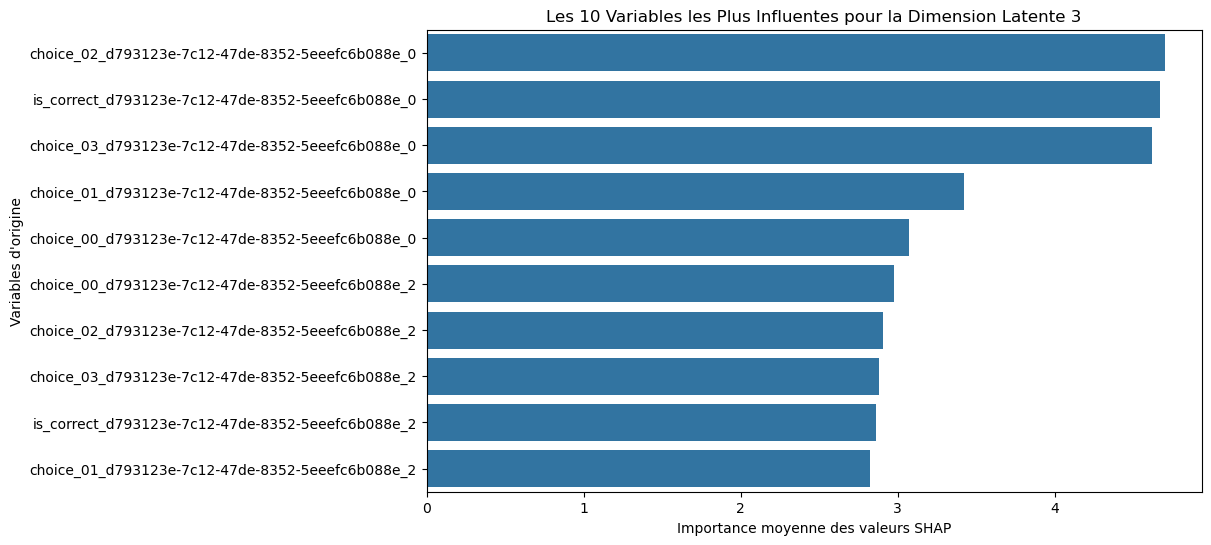

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pour chaque dimension latente
i=2 # dimensions latentes
shap_val = shap_values[:, :, i]  # Valeurs SHAP pour la i-√®me dimension latente (9000, 724)
    
# Cr√©er un DataFrame des valeurs SHAP pour les variables d'origine
shap_df = pd.DataFrame(shap_val, columns=final_columns)  # Colonnes correspondant aux variables d'origine
    
# Calcul de l'importance moyenne de chaque variable d'entr√©e pour cette dimension latente
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)  # Moyenne des valeurs absolues
    
# Affichage des 5 variables les plus influentes sous forme de barplot horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_shap_values.head(10).values, y=mean_shap_values.head(10).index, orient='h')  # Orient√© horizontalement
plt.title(f"Les 10 Variables les Plus Influentes pour la Dimension Latente {i+1}")
plt.xlabel("Importance moyenne des valeurs SHAP")
plt.ylabel("Variables d'origine")
plt.show()


Cette dimension semble capturer la **sensibilit√© du candidat aux questions difficiles ou pi√®ges** dans l'examen th√©orique.  Les variables cl√©s sont :   
1. **√âchecs aux m√™mes questions sp√©cifiques** (choice_02_..., choice_03_..., choice_01_..., is_correct_...) : Indique que certaines questions reviennent souvent parmi les erreurs du candidat.  
2. **Pr√©sence d‚Äôoptions "Non Renseign√©"** (choice_00_..._2, choice_02_..._2, etc.) : Le candidat n‚Äôa peut-√™tre pas r√©pondu ou a h√©sit√©, sugg√©rant une **incertitude face aux questions complexes**.  

La **dimension latente 3** refl√®te la **difficult√© du candidat avec les questions th√©oriques complexes**, particuli√®rement celles qui induisent en erreur ou demandent une compr√©hension plus fine des r√®gles. Cela peut indiquer un manque de confiance ou une h√©sitation face aux pi√®ges du test.  


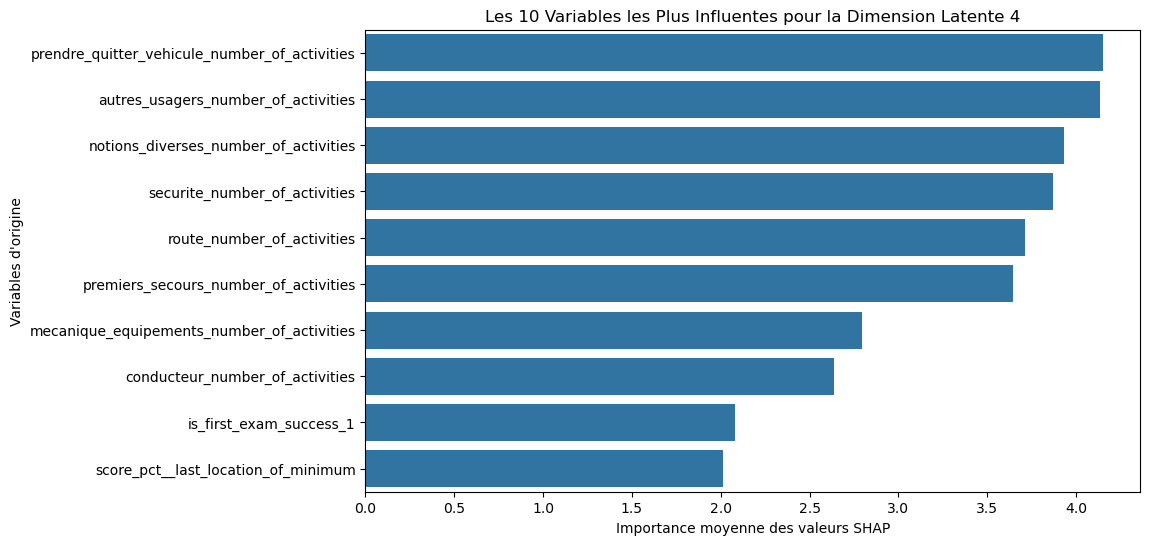

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pour chaque dimension latente
i=3 # dimensions latentes
shap_val = shap_values[:, :, i]  # Valeurs SHAP pour la i-√®me dimension latente (9000, 724)
    
# Cr√©er un DataFrame des valeurs SHAP pour les variables d'origine
shap_df = pd.DataFrame(shap_val, columns=final_columns)  # Colonnes correspondant aux variables d'origine
    
# Calcul de l'importance moyenne de chaque variable d'entr√©e pour cette dimension latente
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)  # Moyenne des valeurs absolues
    
# Affichage des 5 variables les plus influentes sous forme de barplot horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_shap_values.head(10).values, y=mean_shap_values.head(10).index, orient='h')  # Orient√© horizontalement
plt.title(f"Les 10 Variables les Plus Influentes pour la Dimension Latente {i+1}")
plt.xlabel("Importance moyenne des valeurs SHAP")
plt.ylabel("Variables d'origine")
plt.show()



Cette dimension semble refl√©ter **l'implication du candidat dans les diff√©rentes cat√©gories d‚Äôexercices pratiques**.  Les variables cl√©s sont :  
1. **Nombre d‚Äôactivit√©s r√©alis√©es** (prendre_quitter_vehicule_number_of_activities, route_number_of_activities, securite_number_of_activities, etc.) : Indique le volume d‚Äôexercices effectu√©s dans diff√©rents domaines.  
2. **Th√®mes couverts** (m√©canique, premiers secours, autres usagers, etc.) :  Montre si le candidat a explor√© plusieurs aspects du code et de la conduite.  
3. **Succ√®s au premier examen th√©orique** (is_first_exam_success_1) :  Une corr√©lation avec la r√©ussite sugg√®re que l'engagement pratique peut influencer les performances th√©oriques.  

La **dimension latente 4** repr√©sente **l‚Äôimplication du candidat dans la formation pratique** et sa diversit√© d‚Äôexercices. Un score √©lev√© ici pourrait indiquer un candidat **s√©rieux et appliqu√©** dans son apprentissage.  


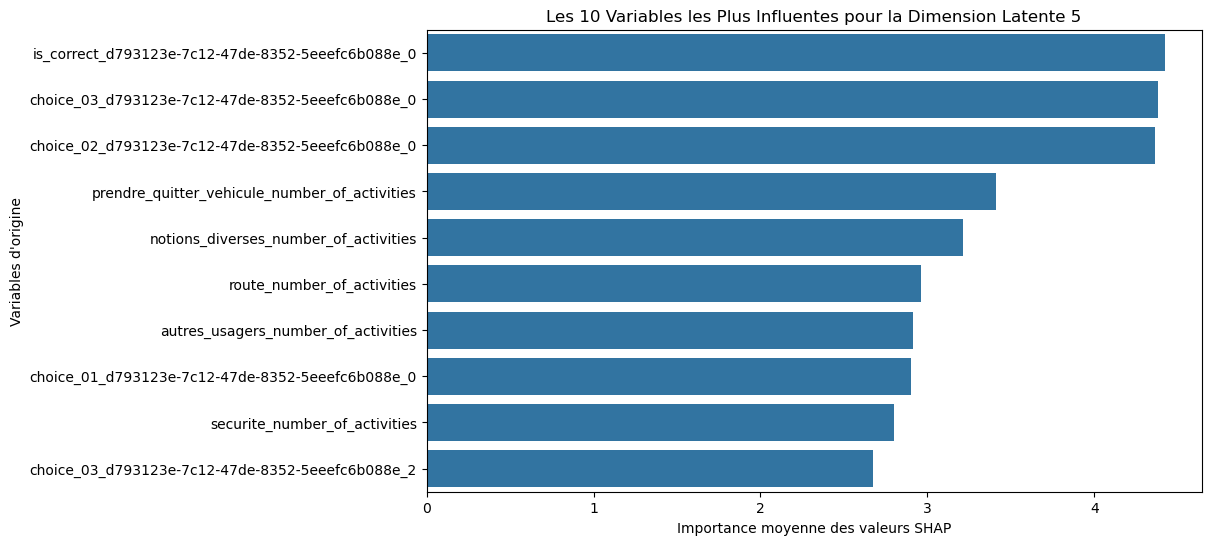

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pour chaque dimension latente
i=4 # dimensions latentes
shap_val = shap_values[:, :, i]  # Valeurs SHAP pour la i-√®me dimension latente (9000, 724)
    
# Cr√©er un DataFrame des valeurs SHAP pour les variables d'origine
shap_df = pd.DataFrame(shap_val, columns=final_columns)  # Colonnes correspondant aux variables d'origine
    
# Calcul de l'importance moyenne de chaque variable d'entr√©e pour cette dimension latente
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)  # Moyenne des valeurs absolues
    
# Affichage des 5 variables les plus influentes sous forme de barplot horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_shap_values.head(10).values, y=mean_shap_values.head(10).index, orient='h')  # Orient√© horizontalement
plt.title(f"Les 10 Variables les Plus Influentes pour la Dimension Latente {i+1}")
plt.xlabel("Importance moyenne des valeurs SHAP")
plt.ylabel("Variables d'origine")
plt.show()


Cette dimension semble r√©fl√©ter la **Performance sur des Questions Sp√©cifiques et Exp√©rience Pratique**  

Les variables cl√©s sont :  
1. **R√©ponses correctes sur des questions sp√©cifiques** (is_correct_d793123e‚Ä¶, choice_03‚Ä¶, choice_02‚Ä¶) :  Indique si le candidat a bien r√©pondu √† certaines questions du test.  
2. **Nombre d‚Äôactivit√©s pratiques** (prendre_quitter_vehicule_number_of_activities, notions_diverses_number_of_activities, route_number_of_activities, etc.) :  Refl√®te l'exp√©rience accumul√©e dans diff√©rents aspects de la conduite.  

Cette **dimension latente 5** semble capturer **la capacit√© √† r√©pondre correctement √† des questions cibl√©es tout en ayant une certaine exp√©rience pratique**. Un score √©lev√© peut refl√©ter un candidat **qui combine th√©orie et application**.  

